In [23]:
#dataset download
import opendatasets as od

#data
import pandas as pd

#visualization
import matplotlib.pyplot as plt

In [2]:
od.download("https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading data-science-job-salaries.zip to .\data-science-job-salaries


100%|██████████| 7.37k/7.37k [00:00<00:00, 630kB/s]

In [11]:
df = pd.read_csv("data-science-job-salaries\ds_salaries.csv")

In [15]:
df.shape

(607, 12)

In [14]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df.columns.values

array(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'], dtype=object)

Some labels that might be unclear:
 - Unnamed: the order of data in the csv file.
 - work_year: The year the salary was paid.
 - employee_residente: a country code.
 - remote_ratio: Amount of work done remotely.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


- 607 entries
- We don't have any null values
- Only int and object types

Which features are not useful?
- "Unnamed" has no real use
- "salary" and "salary_currency" are not needed because we already have "salary_in_usd"

In [20]:
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)

In [22]:
df.shape

(607, 9)

6 categorical columns:

- experience level
- job titles
- employment type
- employment residence
- company location
- company size

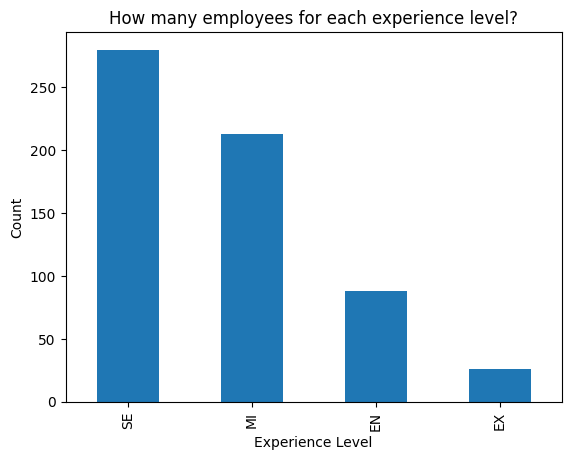

In [34]:
df['experience_level'].value_counts().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('How many employees for each experience level?')
plt.show()


In [26]:
df['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

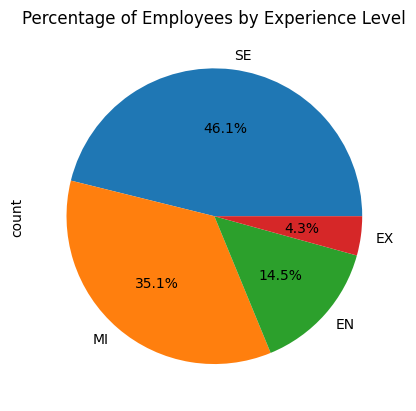

In [41]:
experience_counts = df['experience_level'].value_counts()
experience_percentages = experience_counts / df.shape[0] * 100

experience_percentages.plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Employees by Experience Level')
plt.show()

How many employees are for each experience level?

- 88 Entry-level/Juniors (EN)
- 213 Mid-Level/Intermediates (MI)
- 280 Senior-Level/Experts (SE)
- 26 Executive-Level/Director (EX)

46.1% Experts, 35.1% Intermediates, 14.5% Juniors, 4.3% Directors

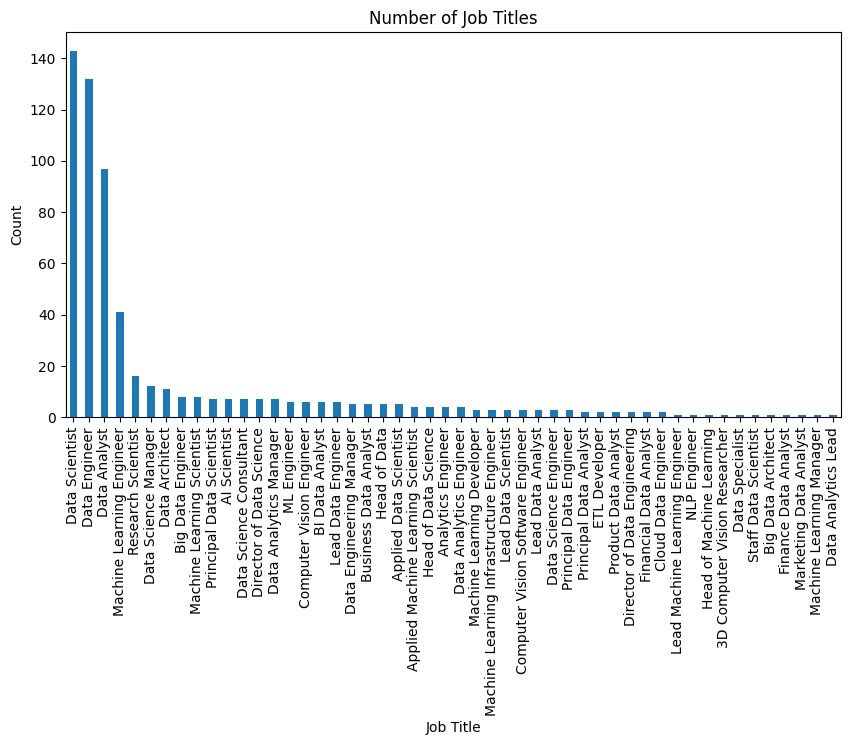

In [65]:
df['job_title'].value_counts().plot(kind='bar', width=0.5, figsize=(10, 5))
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Number of Job Titles')
plt.show()


In [67]:
print('Number of job titles: ',df['job_title'].value_counts().size)

Number of job titles:  50


In [71]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [73]:
job_title_percentages = df['job_title'].value_counts() / df.shape[0] * 100
job_title_percentages


job_title
Data Scientist                              23.558484
Data Engineer                               21.746293
Data Analyst                                15.980231
Machine Learning Engineer                    6.754530
Research Scientist                           2.635914
Data Science Manager                         1.976936
Data Architect                               1.812191
Big Data Engineer                            1.317957
Machine Learning Scientist                   1.317957
Principal Data Scientist                     1.153213
AI Scientist                                 1.153213
Data Science Consultant                      1.153213
Director of Data Science                     1.153213
Data Analytics Manager                       1.153213
ML Engineer                                  0.988468
Computer Vision Engineer                     0.988468
BI Data Analyst                              0.988468
Lead Data Engineer                           0.988468
Data Engineering M

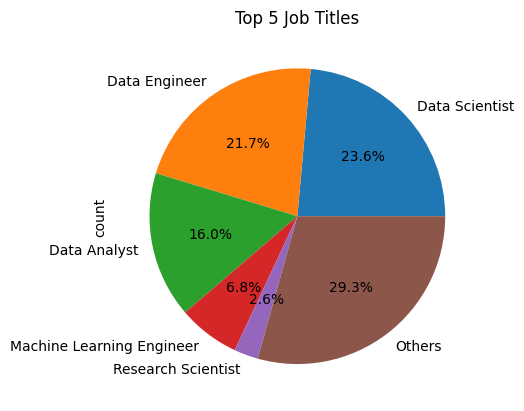

In [84]:
top_5_job_titles = df['job_title'].value_counts().head(5)
others_count = df['job_title'].value_counts().sum() - top_5_job_titles.sum()
top_5_job_titles['Others'] = others_count

top_5_job_titles.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Job Titles')
plt.show()


Top 5 job titles:
- Data scientist (23.6%) 
- Data engineer (21.7%)
- Data analysts(16%) 
- Machine learning engineer(6.8%)